# Demo


In [1]:
from dust import *
from halo import *

E = 2
N_H = 1e22
theta = 10

In [2]:
silicate = Silicate()
graphite = Graphite()

In [3]:
graphite.henke_F(E)

array(1.05688992)

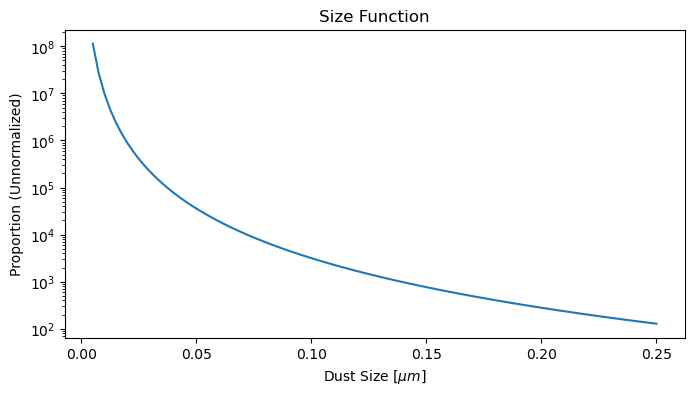

In [4]:
silicate.plot_size_func()

### Gauss RG


In [5]:
halo = Halo(N_H, E, [silicate,graphite])

In [6]:
halo.dsigma_dOmega(.1, silicate, 10)

np.float64(4.399997258919479e-12)

In [7]:
halo.dust_I(silicate, 20)

0.020377524283098854

In [8]:
halo.dust_I(graphite, 20)

0.008036214296955148

In [9]:
halo.I(10)

array([0.05965321])

(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'xRay Halo Intensity'}, xlabel='$\\theta_{obs}$ [arcsec]', ylabel='Intensity'>)

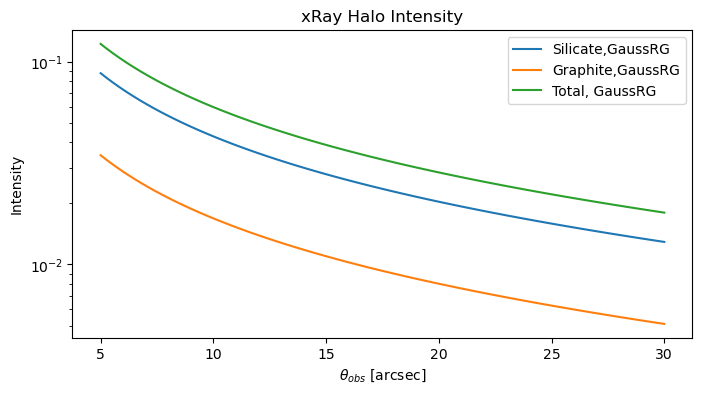

In [10]:
halo.plot_I()

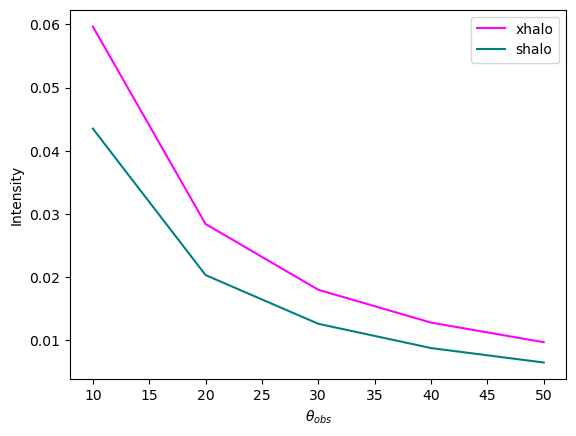

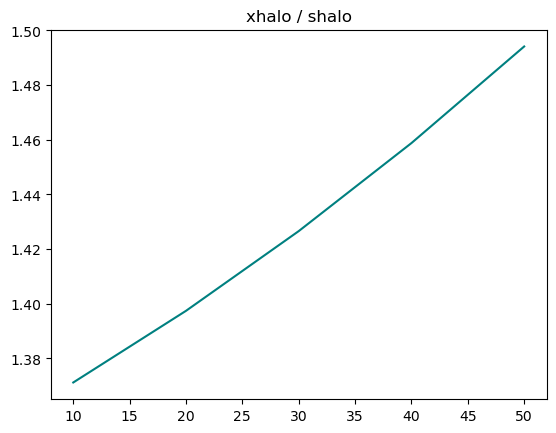

In [18]:
#Compare to shalo
thetas = [10,20,30,40,50]
shalo_I = [0.0435039, 0.0203329, 0.0126232, 0.0087838, 0.00649607]
xhalo_I = halo.I(thetas)

from matplotlib import pyplot as plt
plt.xlabel(r"$\theta_{obs}$")
plt.ylabel(r"Intensity")
plt.plot(thetas,xhalo_I,color="magenta", label="xhalo")
plt.plot(thetas,shalo_I,color="teal", label="shalo")
plt.legend()
plt.show()

plt.title("xhalo / shalo")
plt.plot(thetas, xhalo_I / shalo_I, color="teal", label="shalo")

### Exact RG


In [12]:
exact_halo = Halo(N_H, E, [silicate,graphite], scatter_model="ExactRG")

In [13]:
exact_halo.dsigma_dOmega(.1, silicate, 10)

np.float64(4.291685109779562e-12)

In [14]:
exact_halo.I(10)

array([0.05815397])

(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'xRay Halo Intensity'}, xlabel='$\\theta_{obs}$ [arcsec]', ylabel='Intensity'>)

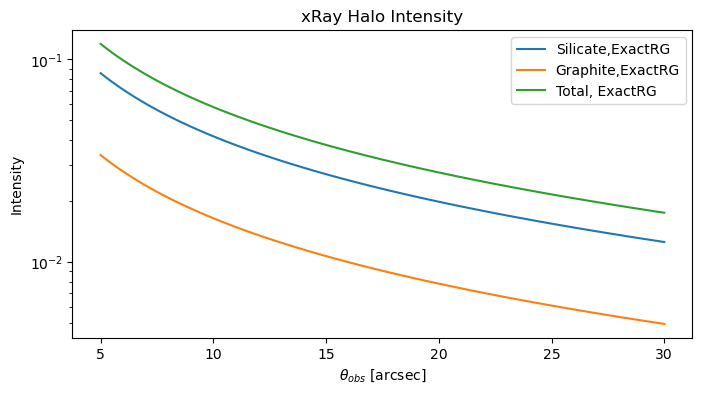

In [15]:
exact_halo.plot_I()

### Mie


In [16]:
E=1
mie_halo = Halo(N_H, E, [silicate,graphite], scatter_model="Mie")
mie_halo.I(10)

array([0.09455965])

(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'xRay Halo Intensity'}, xlabel='$\\theta_{obs}$ [arcsec]', ylabel='Intensity'>)

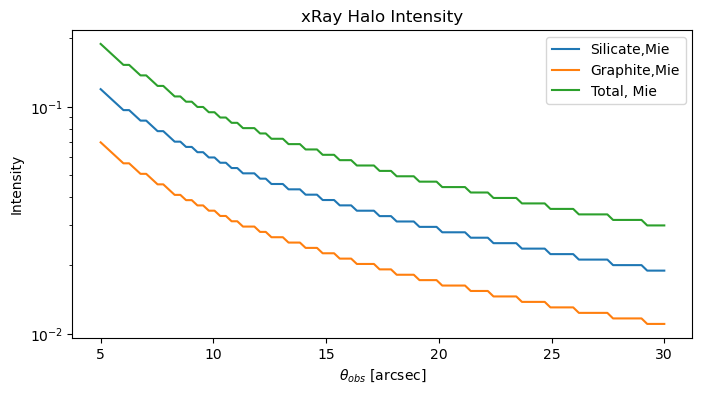

In [17]:
mie_halo.plot_I()

## WD Silicate

In [4]:
from halo import *
from dust import *

E = 2
N_H = 1e22
theta = 10

wd_silicate = Silicate_WD()

halo = Halo(N_H, E, [wd_silicate], scatter_model="GaussRG")
halo.I(20)

array([0.03450383])

## Plot Stacking


In [18]:
E = 1
N_H = 1e22
theta = 10

gauss_halo2 = Halo(N_H, E, [silicate,graphite])
exact_halo2 = Halo(N_H, E, [silicate,graphite], scatter_model="ExactRG")
mie_halo2 = Halo(N_H, E, [silicate,graphite], scatter_model="Mie")

(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'xRay Halo Intensity'}, xlabel='$\\theta_{obs}$ [arcsec]', ylabel='Intensity'>)

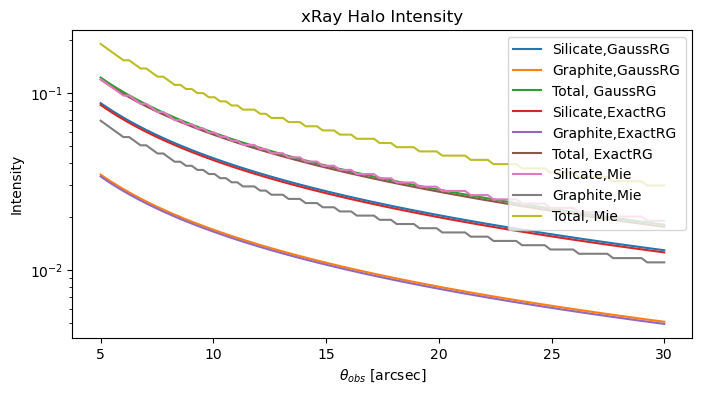

In [19]:
figax = halo.plot_I()
figax = exact_halo.plot_I(figax=figax)
mie_halo.plot_I(figax=figax)

# Workspace


In [18]:
from astropy.io import fits
from astropy.table import Table

In [19]:
hdu = fits.open("dust_data/DsdO_3.30.fits")

In [20]:
hdu.info()

Filename: dust_data/DsdO_3.30.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  H             1 BinTableHDU     36   533664R x 4C   [1E, 1E, 1E, 1E]   


In [21]:
hdu1 = hdu[1]

In [22]:
hdu[1].columns

ColDefs(
    name = 'Energy'; format = '1E'; unit = 'keV'
    name = 'Size'; format = '1E'; unit = 'um'
    name = 'ThetaObs'; format = '1E'; unit = 'arcsec'
    name = 'Intensity'; format = '1E'; unit = 'cm^2 arcmin^-2'
)

In [23]:
df = Table(hdu1.data).to_pandas()
df

,Energy,Size,ThetaObs,Intensity
0,0.300,0.005,5.000000,6.285660e-26
1,0.300,0.005,5.269294,5.879412e-26
2,0.300,0.005,5.553093,5.502271e-26
3,0.300,0.005,5.852177,5.154870e-26
4,0.300,0.005,6.167368,4.840606e-26
...,...,...,...,...
533659,1.475,0.545,810.718628,3.165237e-28
533660,1.475,0.545,854.382996,2.619681e-28
533661,1.475,0.545,900.399109,2.353275e-28
533662,1.475,0.545,948.893677,1.780529e-28


In [24]:
list1 = [1,2,3,4]
list2 = [2,1,3,5]

mask = np.where(list1 < list2)
print(mask)
list1[mask]

ValueError: Calling nonzero on 0d arrays is not allowed. Use np.atleast_1d(scalar).nonzero() instead. If the context of this error is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.